In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
import warnings
warnings.filterwarnings('ignore')

C:\Users\Prakhar Jadaun\AppData\Roaming\Python\Python311\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# loading the dataset
df=pd.read_csv("custom_data/annot.csv")
df2=pd.read_csv("custom_data/annot1.csv")

df=pd.concat([df,df2],ignore_index=False)
df.shape

(765, 2)

In [16]:
data_path="custom_data/images/"
def get_paths(x):
  return data_path+x

df['images']=df['images'].apply(lambda x:get_paths(x))
df.reset_index(inplace=True,drop=True)
df.head()

,images,label
0,custom_data/images/64-1.png,Bilazo
1,custom_data/images/64-2.png,Tb Livisiz -m
2,custom_data/images/64-3.png,histoglob s/c 1sht
3,custom_data/images/65-1.png,Bilazo 20mg
4,custom_data/images/65-2.png,Levosiz-M SOS


In [17]:
processor = TrOCRProcessor.from_pretrained('microsoft/trocr-base-handwritten')
model = VisionEncoderDecoderModel.from_pretrained('model')

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [18]:
index= 104

In [19]:
path = df.loc[index,"images"]
path

'custom_data/images/4-3.png'

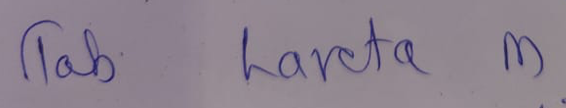

In [20]:
image = Image.open(path).convert("RGB")
image

In [21]:
# image = image.resize((200,100),Image.LANCZOS)
# image

In [22]:
pixel_values = processor(images=image, return_tensors="pt").pixel_values
generated_ids = model.generate(pixel_values)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

In [26]:
print("Generated Text:",generated_text)
print("Actual Text:",df.loc[index,"label"])

Generated Text: Tab Laveta m
Actual Text: Tab Laveta m


In [24]:
df.loc[index,"label"]

'Tab Laveta m'